In [1]:
import random
import numpy as np
from scipy.stats import norm
from scipy.special import logsumexp
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def p(x):
    return 0.5*(norm.pdf(x,0,1)+norm.pdf(x,7,2))

def generate_x(n):
    n12 = n//2
    x1 = np.random.normal(0,1,n12)
    x2 = np.random.normal(7,2,n-n12)
    x = np.concatenate([x1,x2])
    random.shuffle(x)
    return x

def K(x):
    return np.exp(-x*x/2)/(np.sqrt(2*np.pi))

def p_approximate(x,x_train,h):
    n = len(x_train)
    xx = np.repeat(x_train,len(x))
    xx = np.reshape(xx,(n,len(x)))
    k_sum = np.zeros((len(x)))
    for i in range(n):
        k_sum += K((x-xx[i])/h)
    return k_sum/(n*h)

def log_likelihood(x,x_train,h):
    px = p_approximate(x,x_train,h)
    lpx = np.log(px)
    return np.sum(lpx)
    

h = 0.100
mean-log-likelihood
Training: -1.996
Testing : -3.927


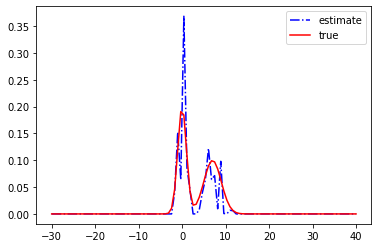

h = 0.200
mean-log-likelihood
Training: -2.151
Testing : -2.830


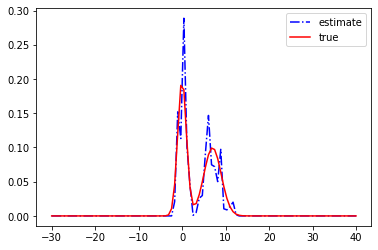

h = 0.500
mean-log-likelihood
Training: -2.301
Testing : -2.530


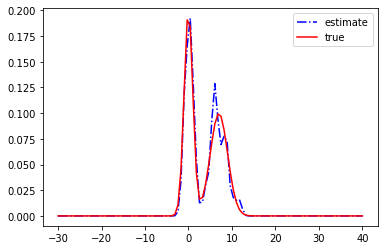

h = 1.000
mean-log-likelihood
Training: -2.409
Testing : -2.496


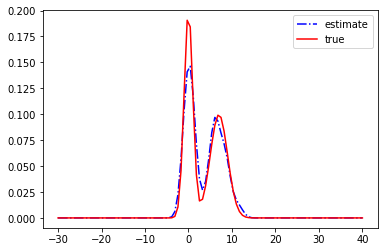

h = 2.000
mean-log-likelihood
Training: -2.614
Testing : -2.639


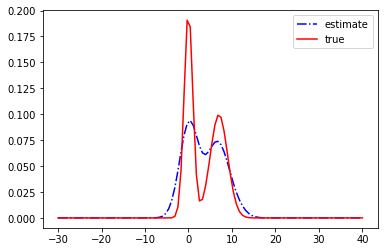

h = 4.000
mean-log-likelihood
Training: -2.853
Testing : -2.868


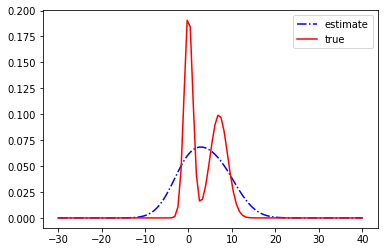

h = 8.000
mean-log-likelihood
Training: -3.191
Testing : -3.199


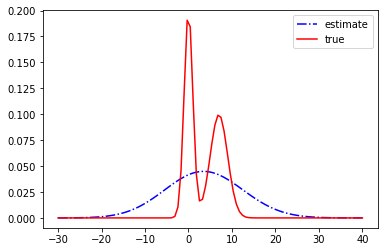

In [3]:
x = generate_x(100) #+ np.random.randn(100)
x_test = generate_x(100) #+ np.random.randn(100)
for h in [0.1,0.2,0.5,1,2,4,8]:
    x_plot = np.linspace(-30,40,100)
    y_plot = p_approximate(x_plot,x,h)
    y      = p(x_plot)
    print("h = %.3f"%(h))
    print("mean-log-likelihood")
    print("Training: %.3f"%(log_likelihood(x,x,h)/len(x)))
    print("Testing : %.3f"%(log_likelihood(x_test,x,h)/len(x_test)))
    plt.plot(x_plot,y_plot,c='b',ls='-.')
    plt.plot(x_plot,y,c='r',ls='-')
    plt.legend(["estimate","true"])
    plt.show()